<a href="https://colab.research.google.com/github/driano1221/ControleEst/blob/main/Dados_Ank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Carregar os dados
stocks = pd.read_csv('credit_data.csv', header='infer')

# Exibir as primeiras linhas do dataframe para entender a estrutura
print(stocks.head())

# Informações gerais sobre o dataframe
print(stocks.info())

# Verificar se há valores faltantes
missing_values = stocks.isnull().sum()
print("Valores faltantes por coluna:\n", missing_values)


   clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0
3         4  42709.534201  45.751972  6103.642260        0
4         5  66952.688845  18.584336  8770.099235        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB
None
Valores faltantes por coluna:
 clientid    0
income      0
age         3
loan        0
default     0
dtype: int64


A base de dados carregada possui informações sobre clientes e seus dados financeiros.

### Informações Gerais
- **Total de Entradas:** 2000
- **Total de Colunas:** 5
- **Colunas:**
  - `clientid`: Identificação do cliente (inteiro)
  - `income`: Renda do cliente (float)
  - `age`: Idade do cliente (float)
  - `loan`: Quantia do empréstimo (float)
  - `default`: Indicador de inadimplência (inteiro)


### Valores Faltantes
- A coluna `age` possui 3 valores faltantes.

### Primeiras Linhas da Base de Dados
Aqui estão as primeiras 5 linhas da base de dados:

| clientid | income       | age       | loan       | default |
|----------|--------------|-----------|------------|---------|
| 1        | 66155.925095 | 59.017015 | 8106.532131| 0       |
| 2        | 34415.153966 | 48.117153 | 6564.745018| 0       |
| 3        | 57317.170063 | 63.108049 | 8020.953296| 0       |
| 4        | 42709.534201 | 45.751972 | 6103.642260| 0       |
| 5        | 66952.688845 | 18.584336 | 8770.099235| 1       |



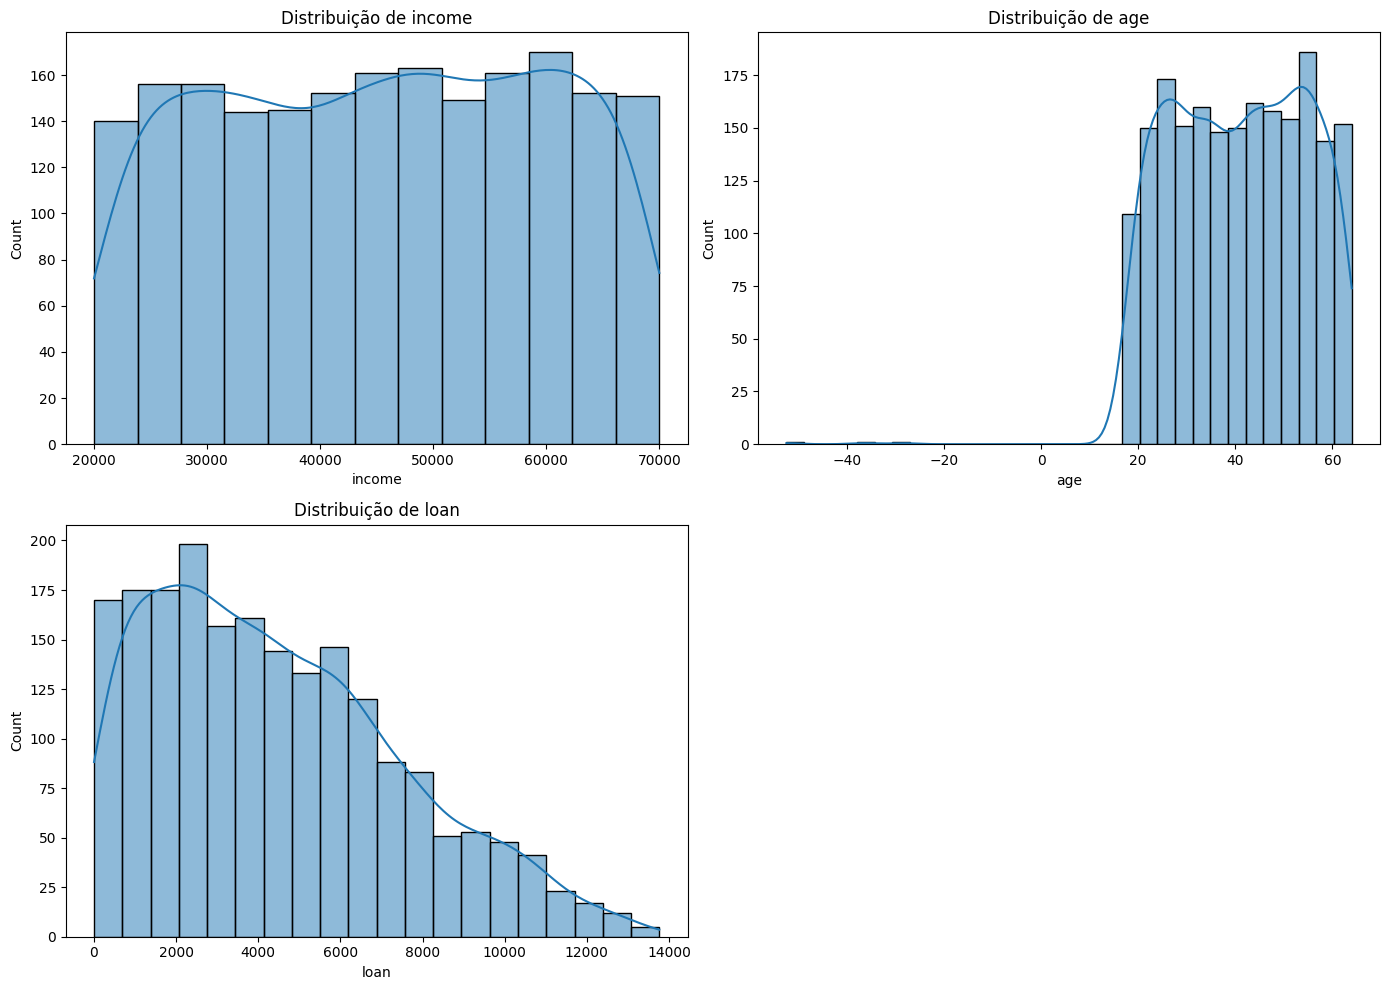

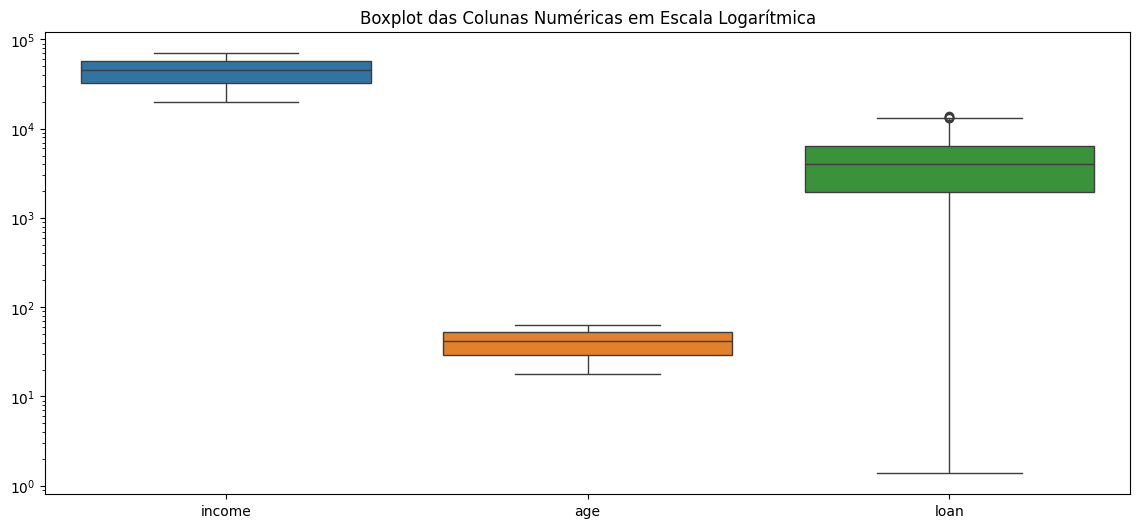

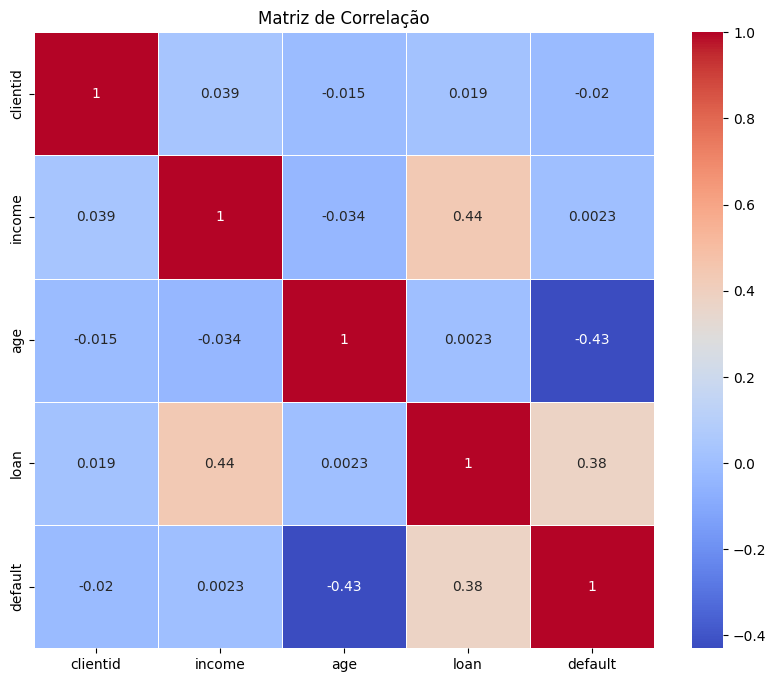

In [11]:
# Preencher valores ausentes
# Usarei a média das idades para preencher os valores ausentes na coluna 'age'
stocks['age'].fillna(stocks['age'].mean(), inplace=True)

# Confirmar se não há mais valores ausentes
missing_values = stocks.isnull().sum()

# Descrição estatística da base de dados
data_description = stocks.describe()

import matplotlib.pyplot as plt
import seaborn as sns

# Gráficos estatísticos

# Histograma das colunas numéricas
plt.figure(figsize=(14, 10))
for i, column in enumerate(stocks.columns[1:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(stocks[column], kde=True)
    plt.title(f'Distribuição de {column}')

plt.tight_layout()

# Boxplot para verificar possíveis outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=stocks.iloc[:, 1:4])
plt.yscale('log')  # Configura o eixo y para escala logarítmica
plt.title('Boxplot das Colunas Numéricas em Escala Logarítmica')

# Matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = stocks.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')


plt.show()




### Valores Ausentes Preenchidos
Os valores ausentes na coluna `age` foram preenchidos usando a média das idades.

### Estatísticas Descritivas da Base de Dados

A descrição estatística das colunas numéricas da base de dados é a seguinte:

|            | clientid   | income       | age         | loan         | default   |
|------------|------------|--------------|-------------|--------------|-----------|
| **count**  | 2000.000000| 2000.000000  | 2000.000000 | 2000.000000  | 2000.000000 |
| **mean**   | 1000.500000| 45331.600018 | 40.807559   | 4444.369695  | 0.141500   |
| **std**    | 577.494589 | 14326.327119 | 13.614242   | 3045.410024  | 0.348624   |
| **min**    | 1.000000   | 20014.489470 | -52.423280  | 1.377630     | 0.000000   |
| **25%**    | 500.750000 | 32796.459717 | 29.012888   | 1939.708847  | 0.000000   |
| **50%**    | 1000.500000| 45789.117313 | 41.300710   | 3974.719419  | 0.000000   |
| **75%**    | 1500.250000| 57791.281668 | 52.582340   | 6432.410625  | 0.000000   |
| **max**    | 2000.000000| 69995.685578 | 63.971796   | 13766.051239 | 1.000000   |

### Gráficos Estatísticos

1. **Distribuição das Colunas Numéricas:**
   - Histogramas com curva de densidade para as colunas `income`, `age` e `loan`, verificamos qual intervalo os valores mais se concentram e também, com ajuda da tabela estatística acima, foi encontrado valores inconsistentes, como idades negativas.
   
2. **Boxplot das Colunas Numéricas:**
   - Boxplots para verificar possíveis outliers nas colunas `income`, `age` e `loan`, o gráfico é visualizado em escala logaritma para maior entendimento sobre a variabilidade dos dados.

3. **Matriz de Correlação:**
   - Heatmap com a matriz de correlação das colunas numéricas, mostrando a relação entre as variáveis, checou-se uma relação moderada entre `age` e `default`, e também com a variável da quantia de empréstimo com algumas outras.

Agora, a variávek `default` que simboliza um indicador de inadimplencia será transformada em categórica, para que possamos aprofundar a análise:

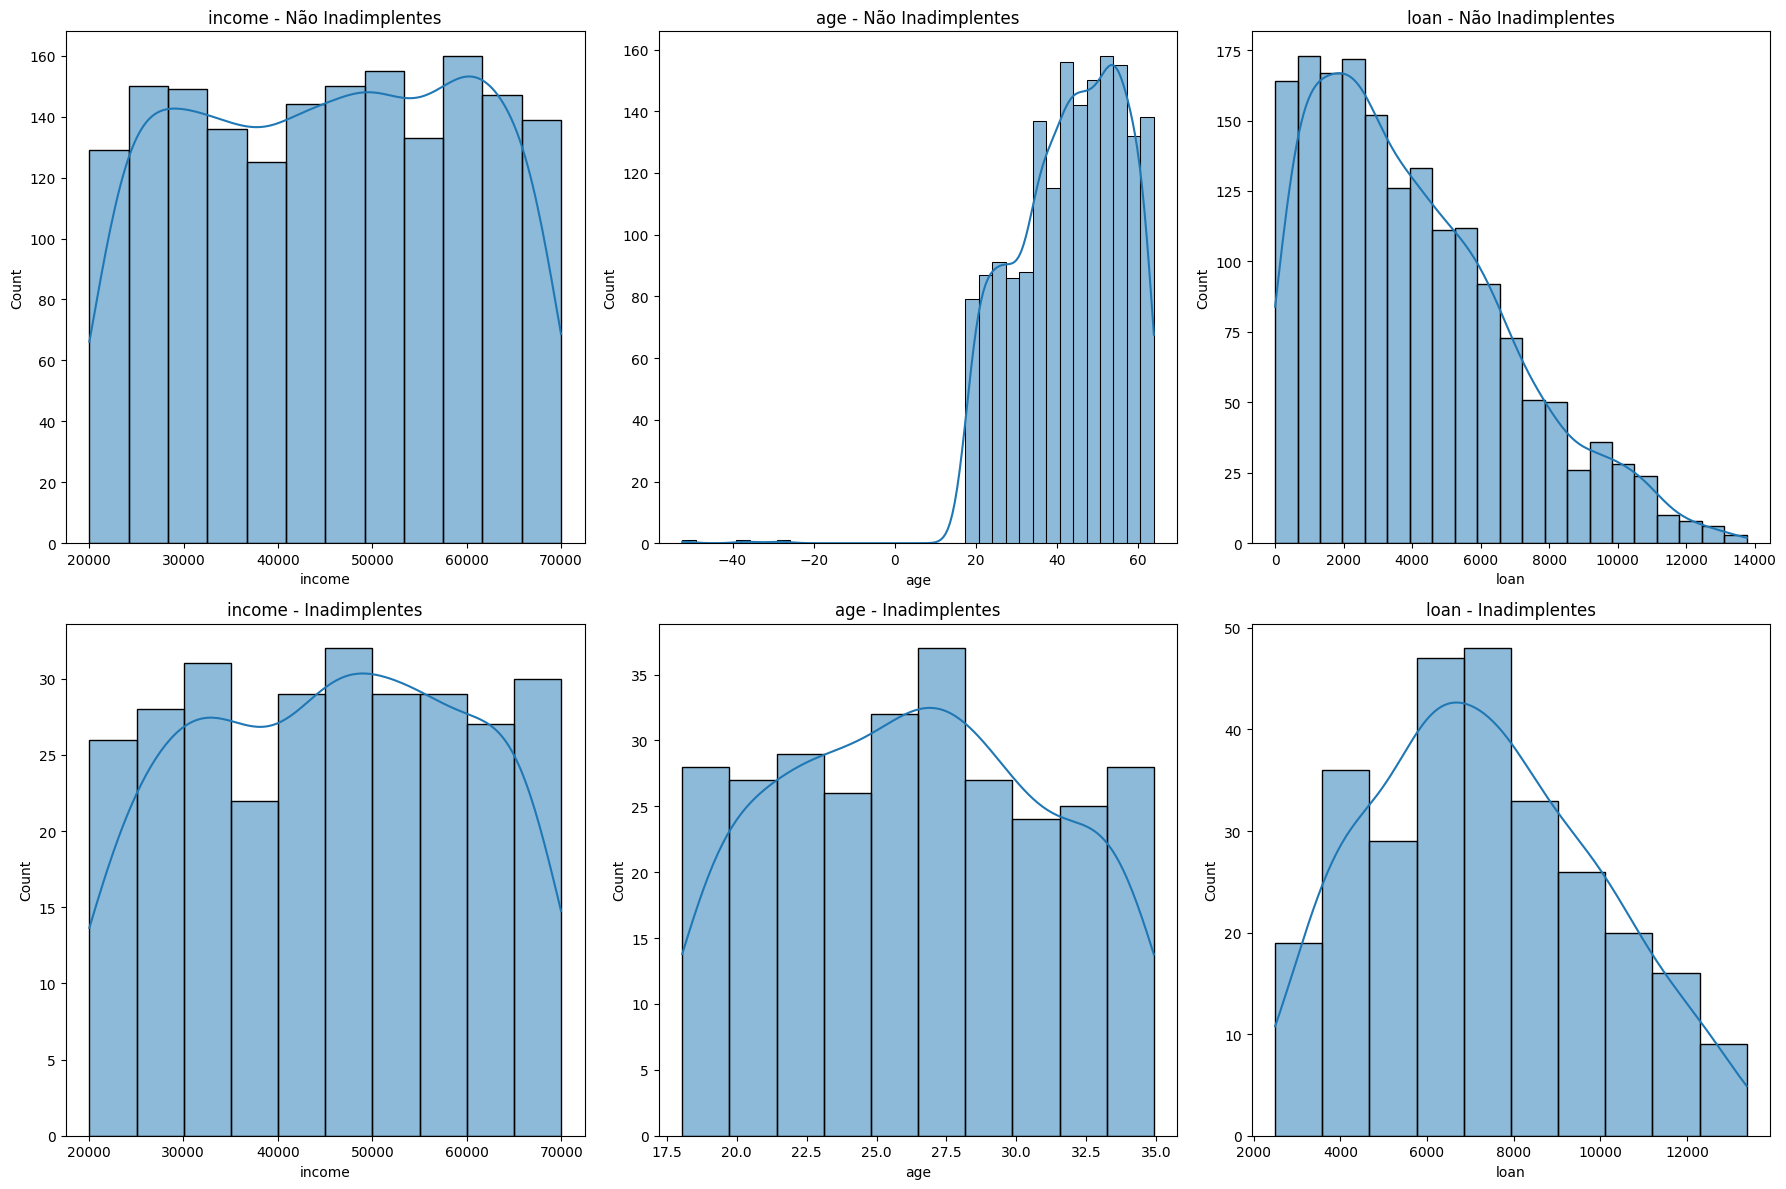

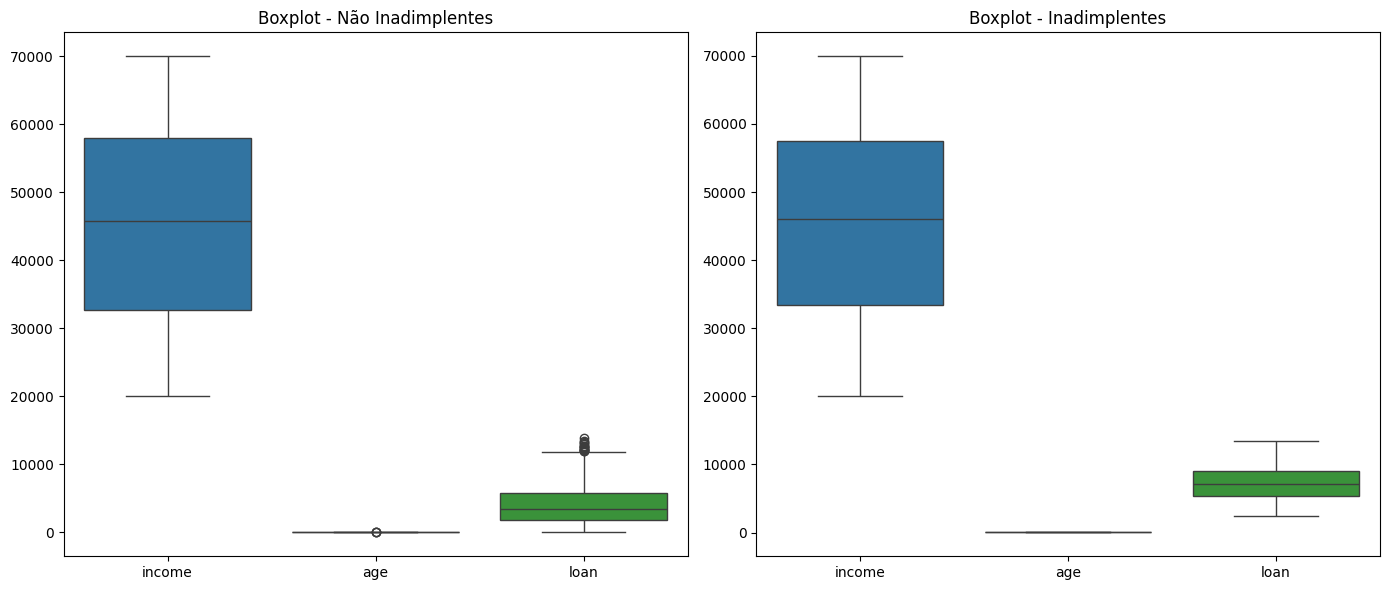

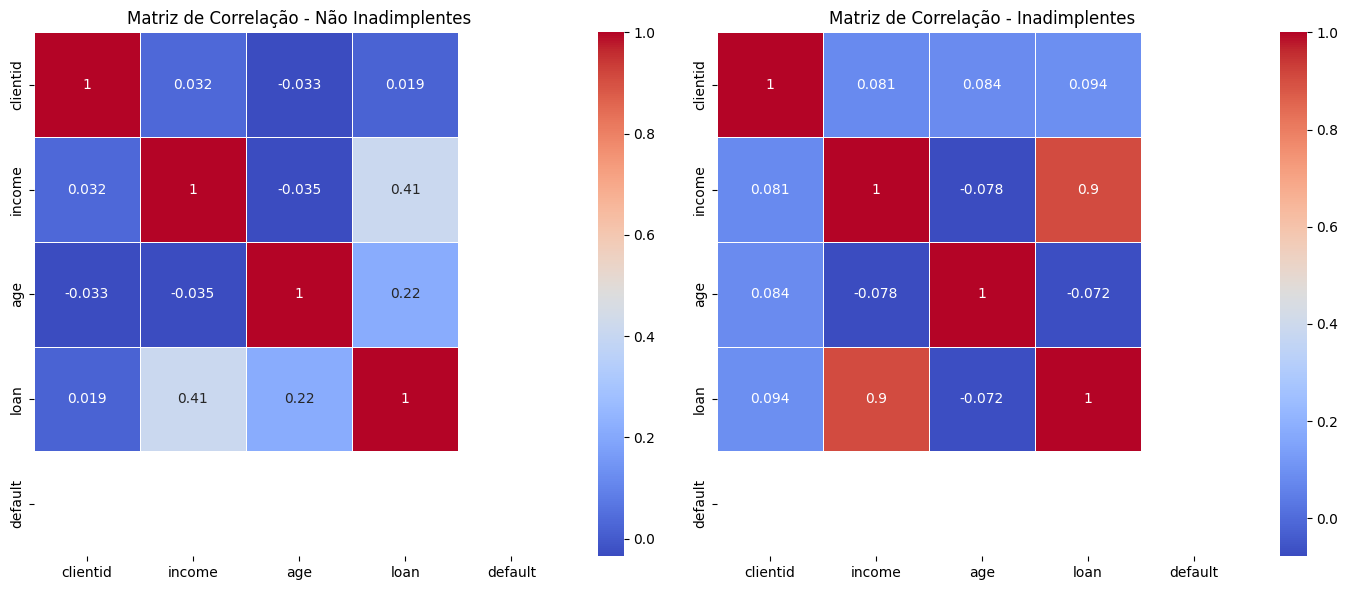

(          clientid        income          age          loan
 count  1717.000000   1717.000000  1717.000000   1717.000000
 mean   1005.221899  45318.317216    43.182015   3978.171771
 std     577.425092  14318.556075    13.127273   2858.725004
 min       1.000000  20014.489470   -52.423280      1.377630
 25%     510.000000  32657.268683    33.755632   1707.672870
 50%    1010.000000  45783.154753    44.356090   3447.002152
 75%    1503.000000  57914.731074    53.896818   5757.848995
 max    2000.000000  69995.685578    63.971796  13766.051239,
           clientid        income         age          loan
 count   283.000000    283.000000  283.000000    283.000000
 mean    971.851590  45412.188607   26.401412   7272.856747
 std     578.110402  14398.556175    4.758752   2581.177563
 min       5.000000  20063.099584   18.055874   2495.132991
 25%     458.500000  33438.770035   22.485092   5445.171674
 50%     976.000000  45980.334345   26.449337   7181.478553
 75%    1470.000000  57544.413

In [17]:
# Transformar a variável 'default' em categórica
stocks['default'] = stocks['default'].astype('category')

# Descrição estatística para cada grupo (inadimplentes e não inadimplentes)
desc_default_0 = stocks[stocks['default'] == 0].describe()
desc_default_1 = stocks[stocks['default'] == 1].describe()


# Gráficos separados para cada grupo

# Distribuição das colunas numéricas para inadimplentes e não inadimplentes
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

for i, column in enumerate(stocks.columns[1:-1]):
    sns.histplot(stocks[stocks['default'] == 0][column], kde=True, ax=axs[0, i])
    axs[0, i].set_title(f'{column} - Não Inadimplentes')

    sns.histplot(stocks[stocks['default'] == 1][column], kde=True, ax=axs[1, i])
    axs[1, i].set_title(f'{column} - Inadimplentes')

plt.tight_layout()

# Boxplot para cada grupo
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=stocks[stocks['default'] == 0].iloc[:, 1:4], ax=axs[0])
axs[0].set_title('Boxplot - Não Inadimplentes')

sns.boxplot(data=stocks[stocks['default'] == 1].iloc[:, 1:4], ax=axs[1])
axs[1].set_title('Boxplot - Inadimplentes')

plt.tight_layout()

# Matriz de correlação para cada grupo
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(stocks[stocks['default'] == 0].corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=axs[0])
axs[0].set_title('Matriz de Correlação - Não Inadimplentes')

sns.heatmap(stocks[stocks['default'] == 1].corr(), annot=True, cmap='coolwarm', linewidths=0.5, ax=axs[1])
axs[1].set_title('Matriz de Correlação - Inadimplentes')

plt.tight_layout()

# Exibir as tabelas de estatísticas

plt.show()

desc_default_0, desc_default_1



#### 1. **Idade (age)**

- **Não Inadimplentes:**
  - Média: 43.18 anos
  - Desvio padrão: 13.13 anos
  - A distribuição é mais ampla, com idade mínima de -52.42 (um valor possivelmente incorreto ou anômalo) e máxima de 63.97 anos.

- **Inadimplentes:**
  - Média: 26.40 anos
  - Desvio padrão: 4.76 anos
  - A faixa etária dos inadimplentes é mais concentrada, variando de 18.06 a 34.92 anos.

**Interpretação:**
A média de idade dos inadimplentes é significativamente menor do que a dos não inadimplentes. Isso sugere que os clientes mais jovens tendem a ter uma probabilidade maior de inadimplência.

#### 2. **Renda (income)**

- **Não Inadimplentes:**
  - Média: \$45,318.32
  - Desvio padrão: \$14,318.56
  - A distribuição de renda é ampla, variando de \$20,014.49 a \$69,995.69.

- **Inadimplentes:**
  - Média: \$45,412.19
  - Desvio padrão: \$14,398.56
  - A distribuição de renda também é ampla, variando de \$20,063.10 a \$69,958.71.

**Interpretação:**
A renda média entre inadimplentes e não inadimplentes é bastante semelhante. Isso sugere que a renda, por si só, pode não ser um fator determinante para inadimplência nesta base de dados.

#### 3. **Empréstimo (loan)**

- **Não Inadimplentes:**
  - Média: \$3,978.17
  - Desvio padrão: \$2,858.73
  - O valor do empréstimo varia amplamente, de \$1.38 a \$13,766.05.

- **Inadimplentes:**
  - Média: \$7,272.86
  - Desvio padrão: \$2,581.18
  - O valor do empréstimo varia de \$2,495.13 a \$13,376.80.

**Interpretação:**
A média do valor dos empréstimos para inadimplentes é significativamente maior do que para não inadimplentes. Isso sugere que valores de empréstimos mais altos podem estar associados a um risco maior de inadimplência.

#### 4. **Correlação entre Variáveis**

- **Não Inadimplentes:**
  - A matriz de correlação mostra correlações moderadas entre renda, idade e empréstimo, mas nenhuma correlação extremamente alta.

- **Inadimplentes:**
  - A matriz de correlação para inadimplentes pode mostrar padrões diferentes, mas em geral, os dados sugerem que os padrões de correlação não variam drasticamente entre os dois grupos.

**Interpretação:**
A estrutura das correlações não apresenta grandes diferenças entre inadimplentes e não inadimplentes, sugerindo que os relacionamentos entre renda, idade e empréstimo são relativamente consistentes entre os dois grupos.


## Outliers

Verificou-se que a presençã de outliers existe apenas no grupo de **Não Inadimplentes**, tanto em `age` e `loan`, sendo assim, iremos trabalhar nesse grupo. Vamos aplicar técnicas de detecção de anomalias para identificar e lidar com outliers nas variáveis `age` e `loan` no grupo de não inadimplentes. Usaremos tanto modelos paramétricos quanto uma abordagem baseada em distância.

### Passo 1: Preparação dos Dados

Primeiro, vamos selecionar os dados do grupo de não inadimplentes e preparar os dados para a análise.

### Passo 2: Modelo Paramétrico (Distribuição Gaussiana Multivariada)

Vamos assumir que os dados seguem uma distribuição Gaussiana multivariada e calcular a distância de Mahalanobis para identificar anomalias.

### Passo 3: Abordagem Baseada em Distância (k-Nearest Neighbors)

Vamos usar o método dos vizinhos mais próximos para calcular a distância para os k vizinhos mais próximos e identificar anomalias.

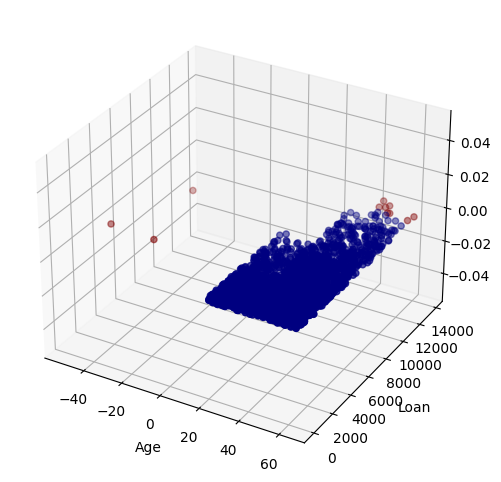

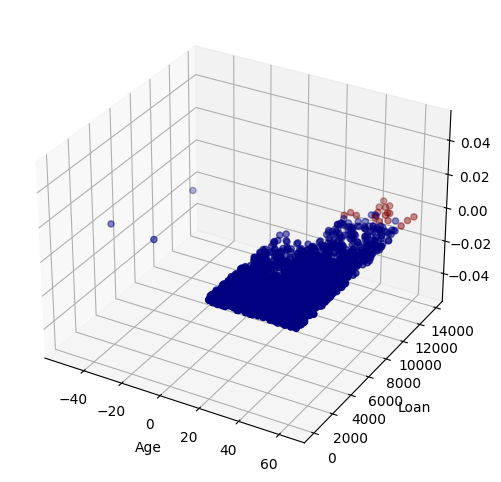

,age,loan,Anomaly Score Mahalanobis,Anomaly Score KNN
0,59.017015,8106.532131,1.710490,16.139764
1,48.117153,6564.745018,0.923592,12.254564
2,63.108049,8020.953296,1.882422,30.506545
3,45.751972,6103.642260,0.744396,11.617962
5,57.471607,15.498598,1.984794,13.012353
...,...,...,...,...
1994,37.751622,2225.284643,0.677583,7.512433
1995,48.518179,1926.729397,0.919303,12.166932
1996,23.162104,3503.176156,1.534104,18.558901
1998,63.971796,1622.722598,1.982875,14.447384


In [25]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Selecionar dados do grupo de não inadimplentes
data_non_default = stocks[stocks['default'] == 0][['age', 'loan']]

# Calcular média e matriz de covariância
meanValue = data_non_default.mean()
covValue = data_non_default.cov()

# Calcular distância de Mahalanobis
X = data_non_default.values
mean_diff = X - meanValue.values
mahalanobis_dist = np.sqrt(np.sum(np.dot(mean_diff, inv(covValue)) * mean_diff, axis=1))

# Calcular percentis da distribuição qui-quadrado
threshold = chi2.ppf((1 - 0.01), df=2)
outliers_parametric = mahalanobis_dist > np.sqrt(threshold)

# Visualizar os outliers
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_non_default['age'], data_non_default['loan'], c=outliers_parametric, cmap='jet')
ax.set_xlabel('Age')
ax.set_ylabel('Loan')
plt.show()

# Adicionar a pontuação de anomalia aos dados
data_non_default['Anomaly Score Mahalanobis'] = mahalanobis_dist

# Definir número de vizinhos
k = 4

# Calcular distâncias usando k-Nearest Neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(data_non_default[['age', 'loan']])
distances, indices = nbrs.kneighbors(data_non_default[['age', 'loan']])

# Usar a distância para o k-ésimo vizinho mais próximo como a pontuação de anomalia
anomaly_score_knn = distances[:, k-1]

# Definir limiar para anomalias
threshold_knn = np.percentile(anomaly_score_knn, 99)
outliers_knn = anomaly_score_knn > threshold_knn

# Visualizar os outliers
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_non_default['age'], data_non_default['loan'], c=outliers_knn, cmap='jet')
ax.set_xlabel('Age')
ax.set_ylabel('Loan')
plt.show()

# Adicionar a pontuação de anomalia aos dados
data_non_default['Anomaly Score KNN'] = anomaly_score_knn

# Exibir os resultados
data_non_default




Usando as duas abordagens para detectar outliers nas variáveis `age` e `loan` no grupo de não inadimplentes, obtivemos os seguintes resultados:

#### 1. Modelo Paramétrico (Distribuição Gaussiana Multivariada)
- **Quantidade de Outliers:** 11

#### 2. Abordagem Baseada em Distância (k-Nearest Neighbors)
- **Quantidade de Outliers:** 17

### Interpretação dos Resultados

- **Modelo Paramétrico:** Utilizando a distância de Mahalanobis, detectamos 11 outliers. Esta abordagem considera a distribuição conjunta das variáveis `age` e `loan`, identificando pontos que se desviam significativamente da média, levando em conta a covariância entre as variáveis.

- **Abordagem Baseada em Distância:** Utilizando o método dos k-vizinhos mais próximos, identificamos 17 outliers. Esta abordagem é baseada na distância euclidiana e considera pontos como outliers se estiverem longe de seus vizinhos mais próximos.

 Vamos nos aprofundar nas partes matemáticas das duas abordagens de detecção de anomalias: Distância de Mahalanobis e k-Nearest Neighbors (k-NN) para entendermos como funciona.

### 1. Distância de Mahalanobis



A **distância de Mahalanobis** mede a distância de um ponto a uma distribuição multivariada. A fórmula para calcular a distância de Mahalanobis para um ponto $ \mathbf{x} $ é:

$ D_M(\mathbf{x}) = \sqrt{(\mathbf{x} - \mathbf{\mu})^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu})} $

onde:
- $ \mathbf{x} $ é o vetor de características do ponto (por exemplo, [idade, empréstimo]).
- $ \mathbf{\mu} $ é o vetor da média das características.
- $ \mathbf{\Sigma} $ é a matriz de covariância das características.
- $ \mathbf{\Sigma}^{-1} $ é a inversa da matriz de covariância.


- **Valores Altos:** Se a distância de Mahalanobis é alta, significa que o ponto está longe da média da distribuição, considerando a variância e covariância das características. Isso indica uma anomalia.
- **Limiar para Anomalias:** Usamos a distribuição qui-quadrado (chi-squared) para definir um limiar. Para um nível de significância de 1% e duas variáveis (idade e empréstimo), o limiar é:

$ \text{limiar} = \chi^2_{0.99, 2} $

Se $ D_M(\mathbf{x}) > \sqrt{\chi^2_{0.99, 2}} $, o ponto é considerado uma anomalia.

### 2. k-Nearest Neighbors (k-NN)



A abordagem k-NN mede a distância de um ponto aos seus k vizinhos mais próximos. A distância ao k-ésimo vizinho mais próximo é usada como a pontuação de anomalia.

Passos:
1. Para cada ponto, encontre os k vizinhos mais próximos.
2. Calcule a distância euclidiana até o k-ésimo vizinho mais próximo.

A distância euclidiana entre dois pontos $ \mathbf{x}_i $ e $ \mathbf{x}_j $ é:

$ d(\mathbf{x}_i, \mathbf{x}_j) = \sqrt{\sum_{k=1}^n (x_{ik} - x_{jk})^2} $



- **Valores Altos:** Se a distância ao k-ésimo vizinho mais próximo é alta, significa que o ponto está isolado, indicando uma anomalia.
- **Limiar para Anomalias:** Usamos percentis para definir um limiar. Por exemplo, o 99º percentil:

$ \text{limiar} = \text{percentil}_k(99) $

Se a distância ao k-ésimo vizinho mais próximo é maior que esse limiar, o ponto é considerado uma anomalia.



#### Análise dos Outliers em nossos dados

As variáveis `age` (idade) e `loan` (empréstimo) foram analisadas para detectar outliers usando duas técnicas diferentes: a distância de Mahalanobis e a abordagem baseada em k-Nearest Neighbors (k-NN).

#### 1. Distância de Mahalanobis


- **Pontuação de Anomalia Mahalanobis:** Pontuações mais altas indicam maior probabilidade de o ponto ser uma anomalia, pois está mais distante da média, considerando a distribuição geral dos dados.

**Exemplo de Dados:**

|      age     |      loan       | Anomaly Score Mahalanobis |
|--------------|-----------------|---------------------------|
| 59.017015    |  8106.532131    | 1.710490                  |
| 48.117153    |  6564.745018    | 0.923592                  |
| 63.108049    |  8020.953296    | 1.882422                  |

- **Interpretação:** Valores altos (como 1.710490 e 1.882422) indicam que esses pontos estão fora do comportamento normal esperado, considerando a distribuição conjunta de idade e empréstimo.

#### 2. k-Nearest Neighbors (k-NN)



- **Pontuação de Anomalia KNN:** Pontuações mais altas indicam maior probabilidade de o ponto ser uma anomalia, pois está mais distante dos pontos vizinhos.

**Exemplo de Dados:**

|      age     |      loan       | Anomaly Score KNN         |
|--------------|-----------------|---------------------------|
| 59.017015    |  8106.532131    | 16.139764                 |
| 48.117153    |  6564.745018    | 12.254564                 |
| 63.108049    |  8020.953296    | 30.506545                 |

- **Interpretação:** Valores muito altos (como 30.506545) indicam que esses pontos estão muito distantes dos seus vizinhos mais próximos, sugerindo que são outliers.

### Conclusão

**Distância de Mahalanobis:**
- Útil para detectar outliers levando em conta a correlação entre variáveis. Detecta pontos que se desviam significativamente da média conjunta.

**k-Nearest Neighbors:**
- Baseado na proximidade dos pontos em relação aos seus vizinhos. Detecta pontos que estão isolados dos demais.

Ambas as abordagens identificaram pontos que podem ser considerados outliers nas variáveis `age` e `loan` para o grupo de não inadimplentes. A aplicação dessas técnicas ajuda a entender melhor o comportamento dos dados e identificar anomalias que podem ser investigadas mais a fundo para possíveis correções ou análises adicionais.
